In [ ]:
pip install ucimlrepo

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy import stats
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
glass_identification = fetch_ucirepo(id=42)

# data (as pandas dataframes)
X = glass_identification.data.features
y = glass_identification.data.targets

# metadata
print(glass_identification.metadata)

# variable information
print(glass_identification.variables)


{'uci_id': 42, 'name': 'Glass Identification', 'repository_url': 'https://archive.ics.uci.edu/dataset/42/glass+identification', 'data_url': 'https://archive.ics.uci.edu/static/public/42/data.csv', 'abstract': 'From USA Forensic Science Service; 6 types of glass; defined in terms of their oxide content (i.e. Na, Fe, K, etc)', 'area': 'Physics and Chemistry', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 214, 'num_features': 9, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Type_of_glass'], 'index_col': ['Id_number'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1987, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5WW2P', 'creators': ['B. German'], 'intro_paper': None, 'additional_info': {'summary': 'Vina conducted a comparison test of her rule-based system, BEAGLE, the nearest-neighbor algorithm, and discriminant analysis.  BEAGLE is a product available through VRS Consulting, In

In [ ]:
X

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [ ]:
# broj na atributi
X.shape[1]

9

In [ ]:
X.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


In [ ]:
y

,Type_of_glass
0,1
1,1
2,1
3,1
4,1
...,...
209,7
210,7
211,7
212,7


In [ ]:
# broj na klasi
len(np.unique(y))

6

In [ ]:
# klasite
np.unique(y)

array([1, 2, 3, 5, 6, 7])

In [ ]:
df = pd.concat([X, y], axis=1)
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [ ]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [ ]:
df["Type_of_glass"].value_counts()

,count
Type_of_glass,
2,76
1,70
7,29
3,17
5,13
6,9


# **Визуелизации**

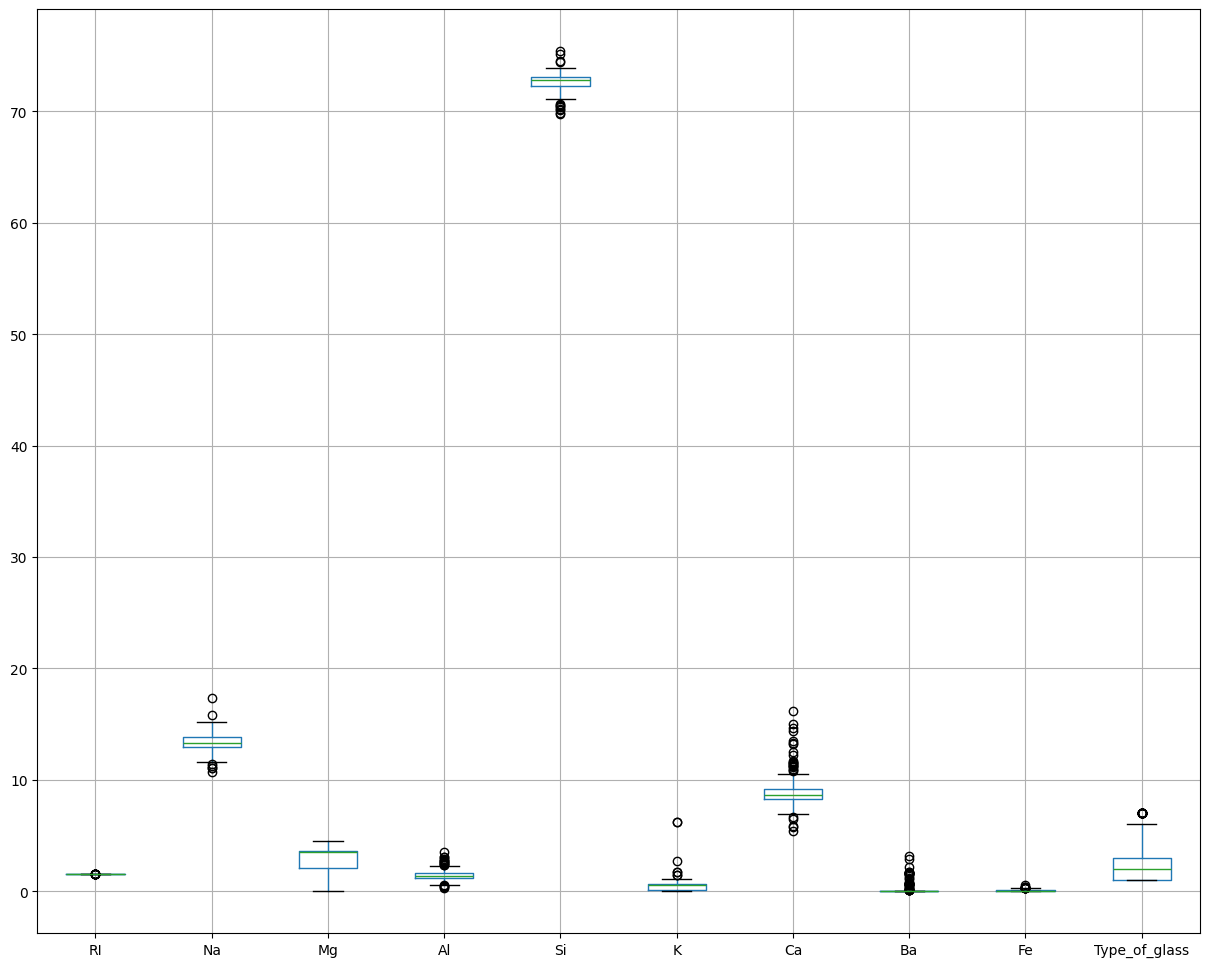

In [ ]:
fig = plt.figure(figsize=(15, 12))
df.boxplot()
plt.show()

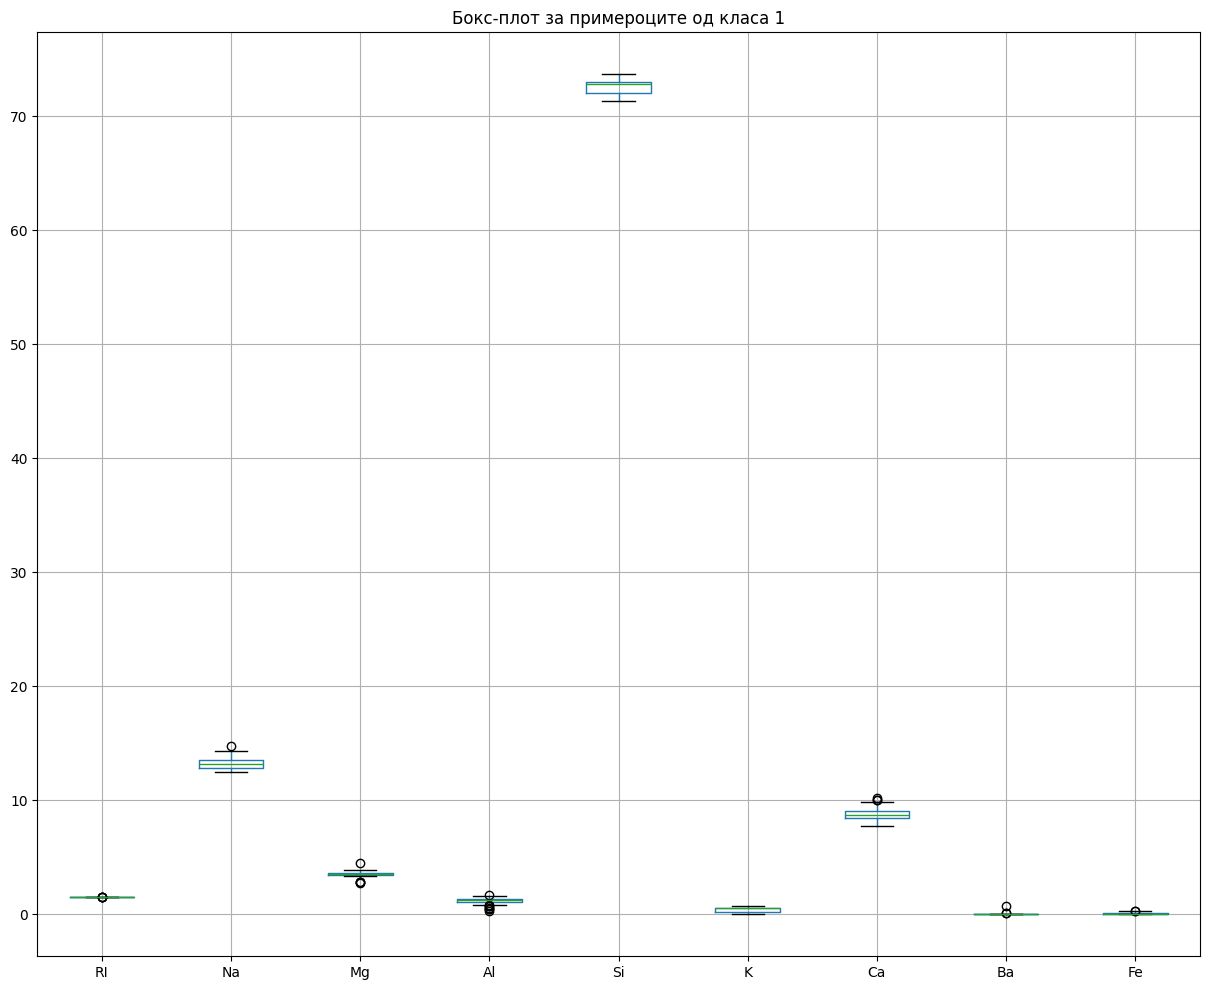

In [ ]:
fig = plt.figure(figsize=(15, 12))
df[df["Type_of_glass"]==1].drop(["Type_of_glass"], axis=1).boxplot()
plt.title('Бокс-плот за примероците од класа 1')
plt.show()

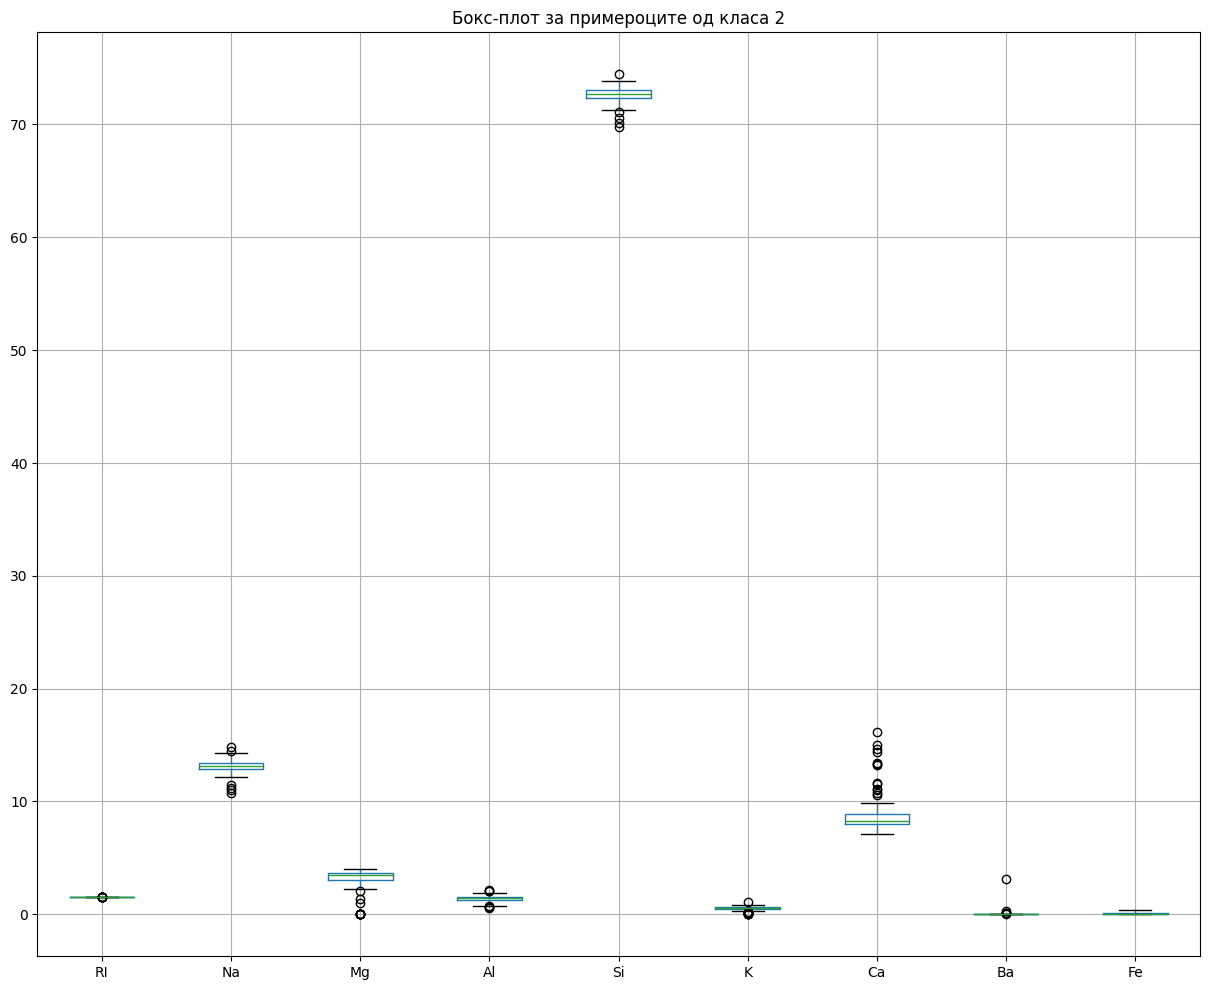

In [ ]:
fig = plt.figure(figsize=(15, 12))
df[df["Type_of_glass"]==2].drop(["Type_of_glass"], axis=1).boxplot()
plt.title('Бокс-плот за примероците од класа 2')
plt.show()

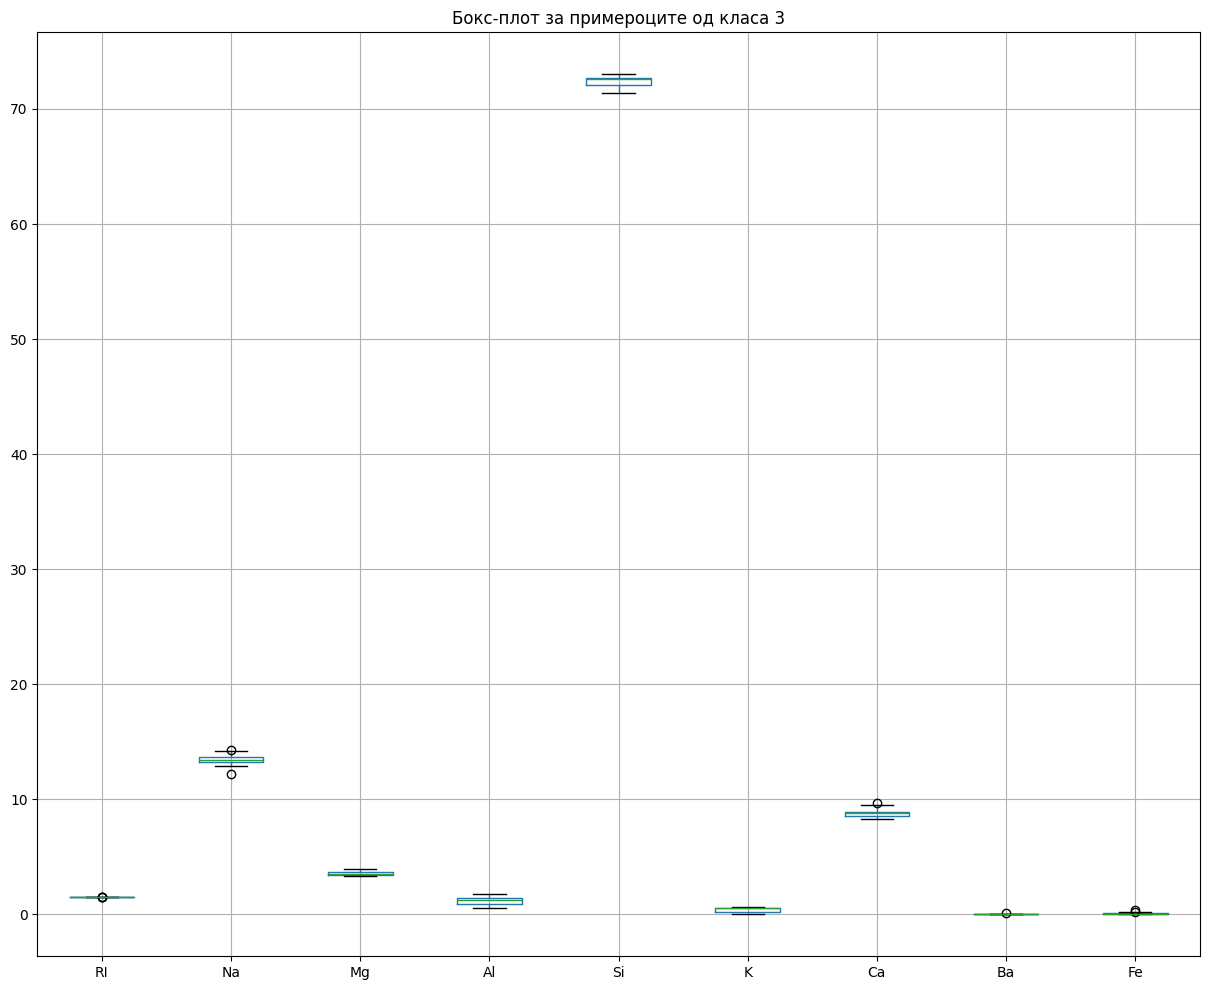

In [ ]:
fig = plt.figure(figsize=(15, 12))
df[df["Type_of_glass"]==3].drop(["Type_of_glass"], axis=1).boxplot()
plt.title('Бокс-плот за примероците од класа 3')
plt.show()

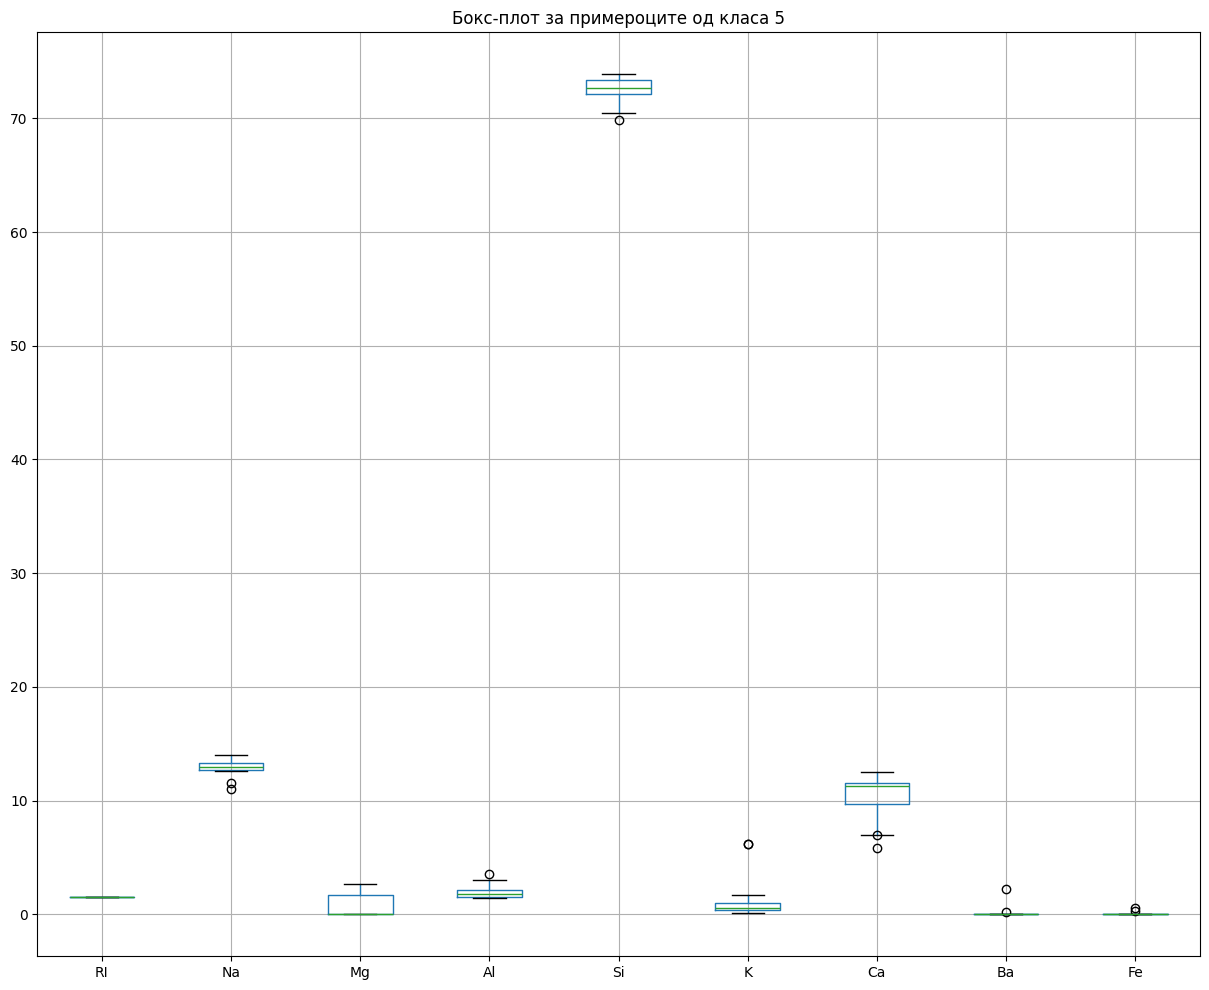

In [ ]:
fig = plt.figure(figsize=(15, 12))
df[df["Type_of_glass"]==5].drop(["Type_of_glass"], axis=1).boxplot()
plt.title('Бокс-плот за примероците од класа 5')
plt.show()

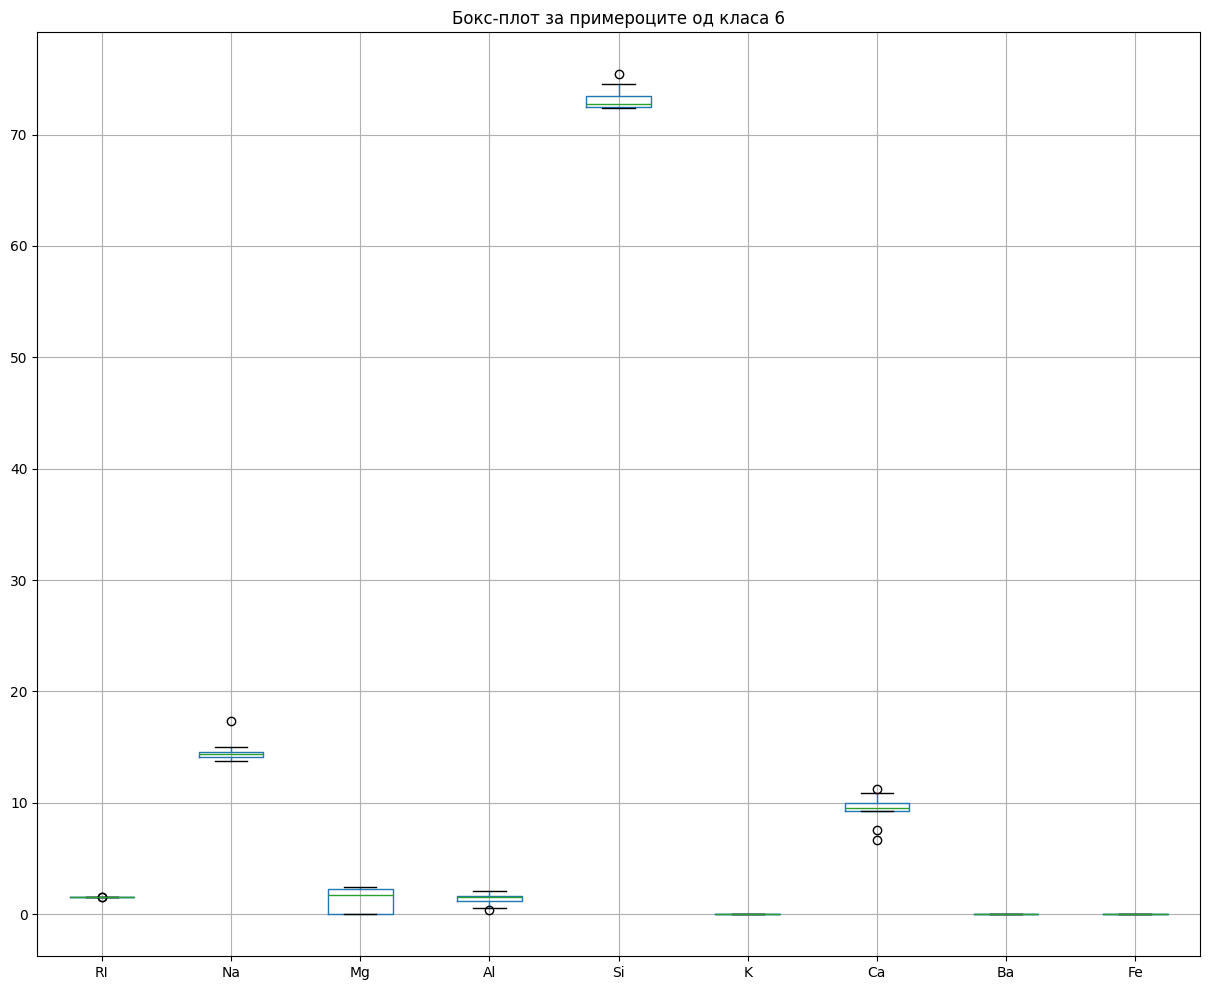

In [ ]:
fig = plt.figure(figsize=(15, 12))
df[df["Type_of_glass"]==6].drop(["Type_of_glass"], axis=1).boxplot()
plt.title('Бокс-плот за примероците од класа 6')
plt.show()

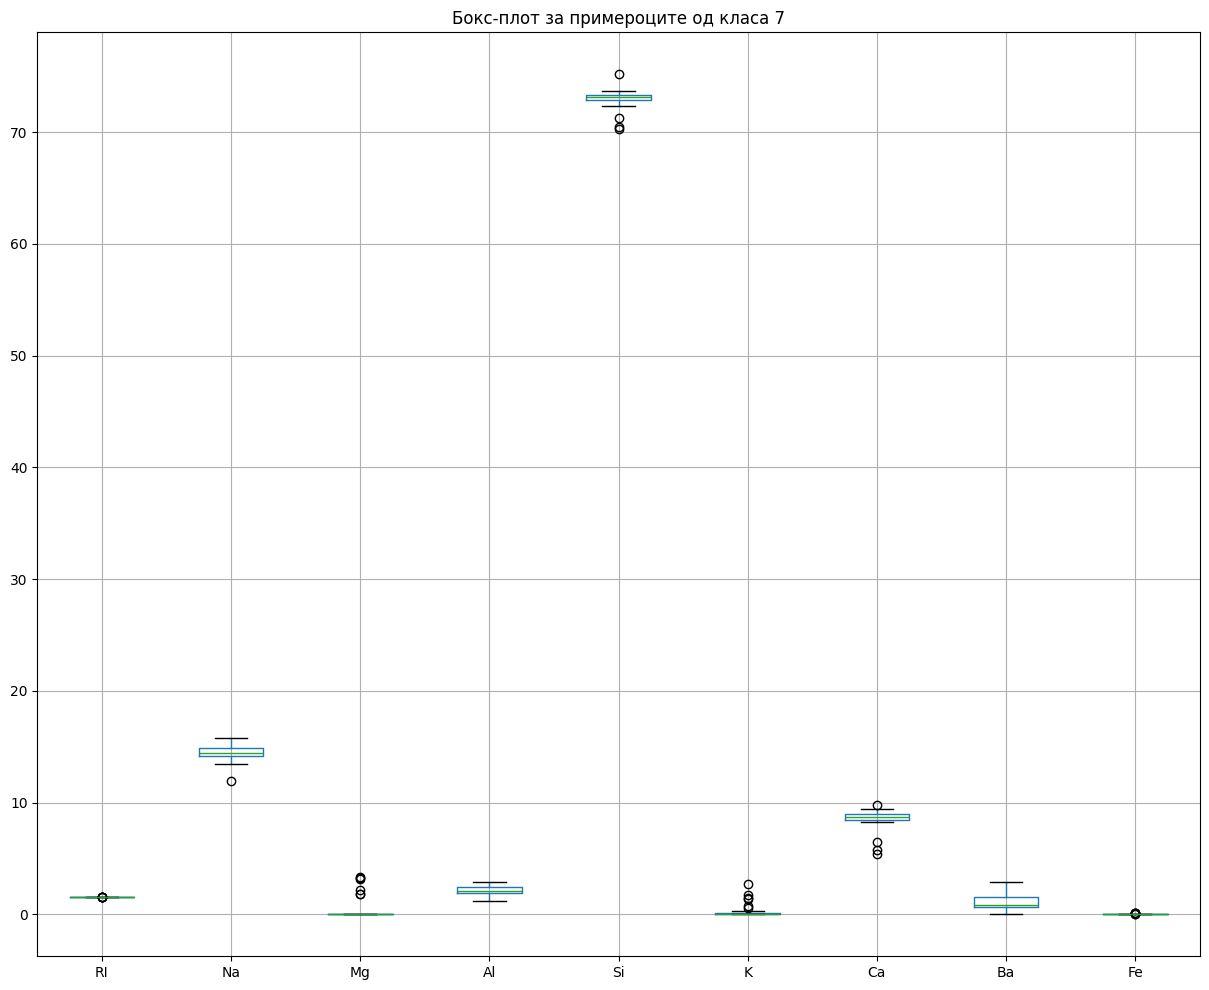

In [ ]:
fig = plt.figure(figsize=(15, 12))
df[df["Type_of_glass"]==7].drop(["Type_of_glass"], axis=1).boxplot()
plt.title('Бокс-плот за примероците од класа 7')
plt.show()

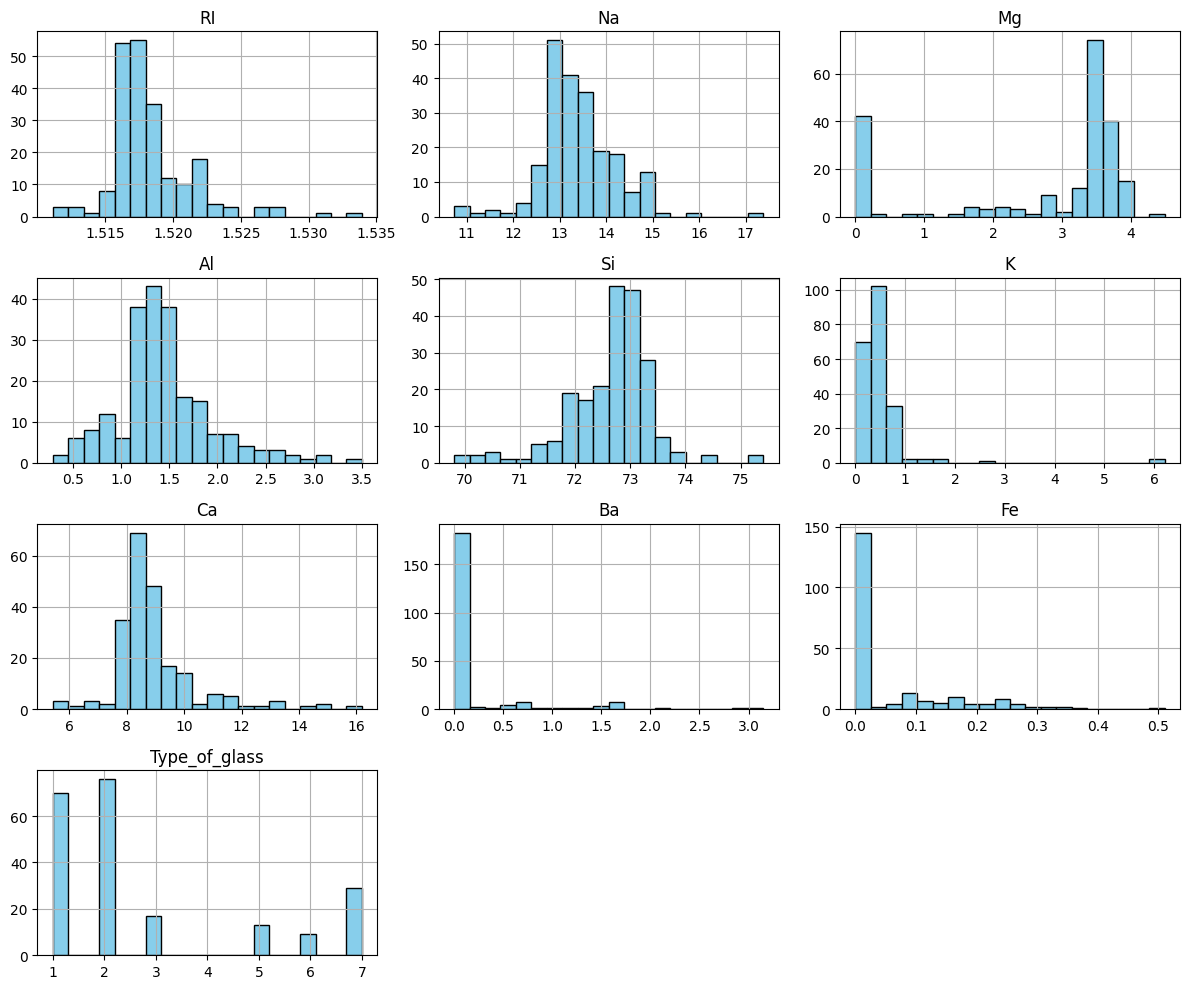

In [ ]:
df.hist(figsize=(12, 10), bins=20, color="skyblue", edgecolor="black")
plt.tight_layout()
plt.show()

In [ ]:
number_of_features = X.shape[1]
feature_names = X.columns.tolist()
number_of_classes = len(np.unique(y))
target_names = np.unique(y)
colors = ["skyblue", "pink", "purple", "darkblue", "cyan", "gray"]

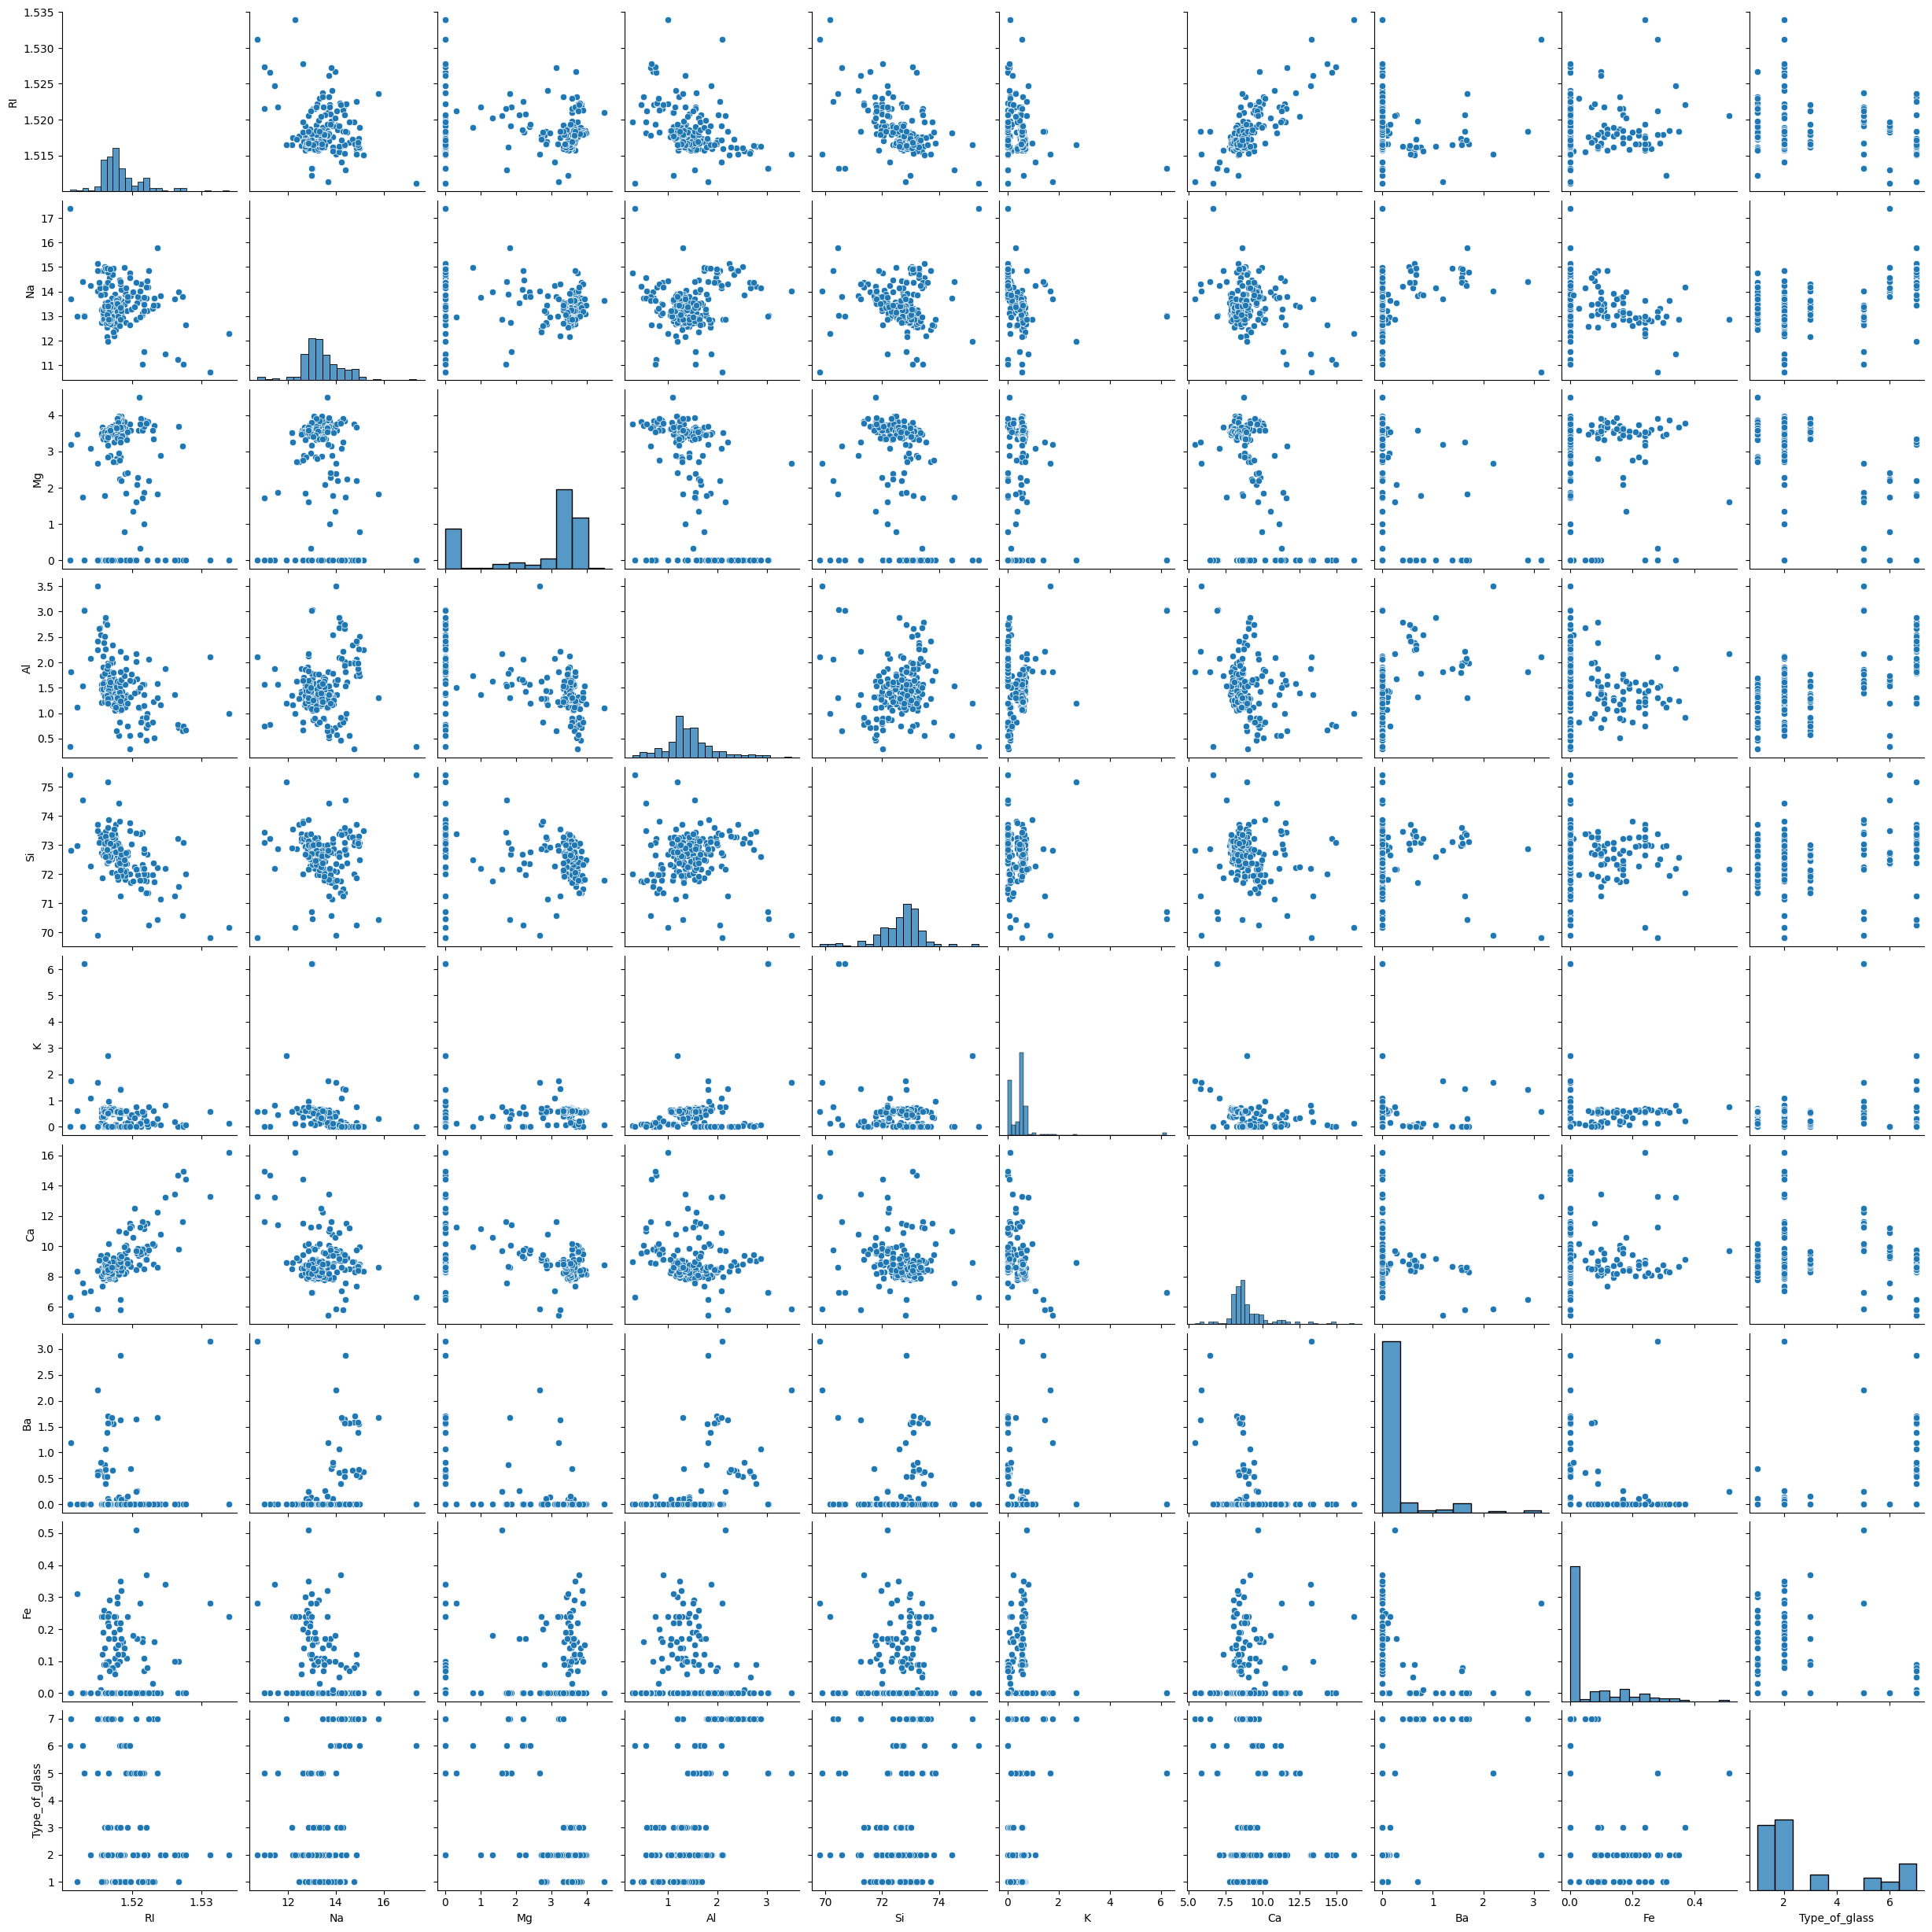

In [ ]:
sns.pairplot(df)

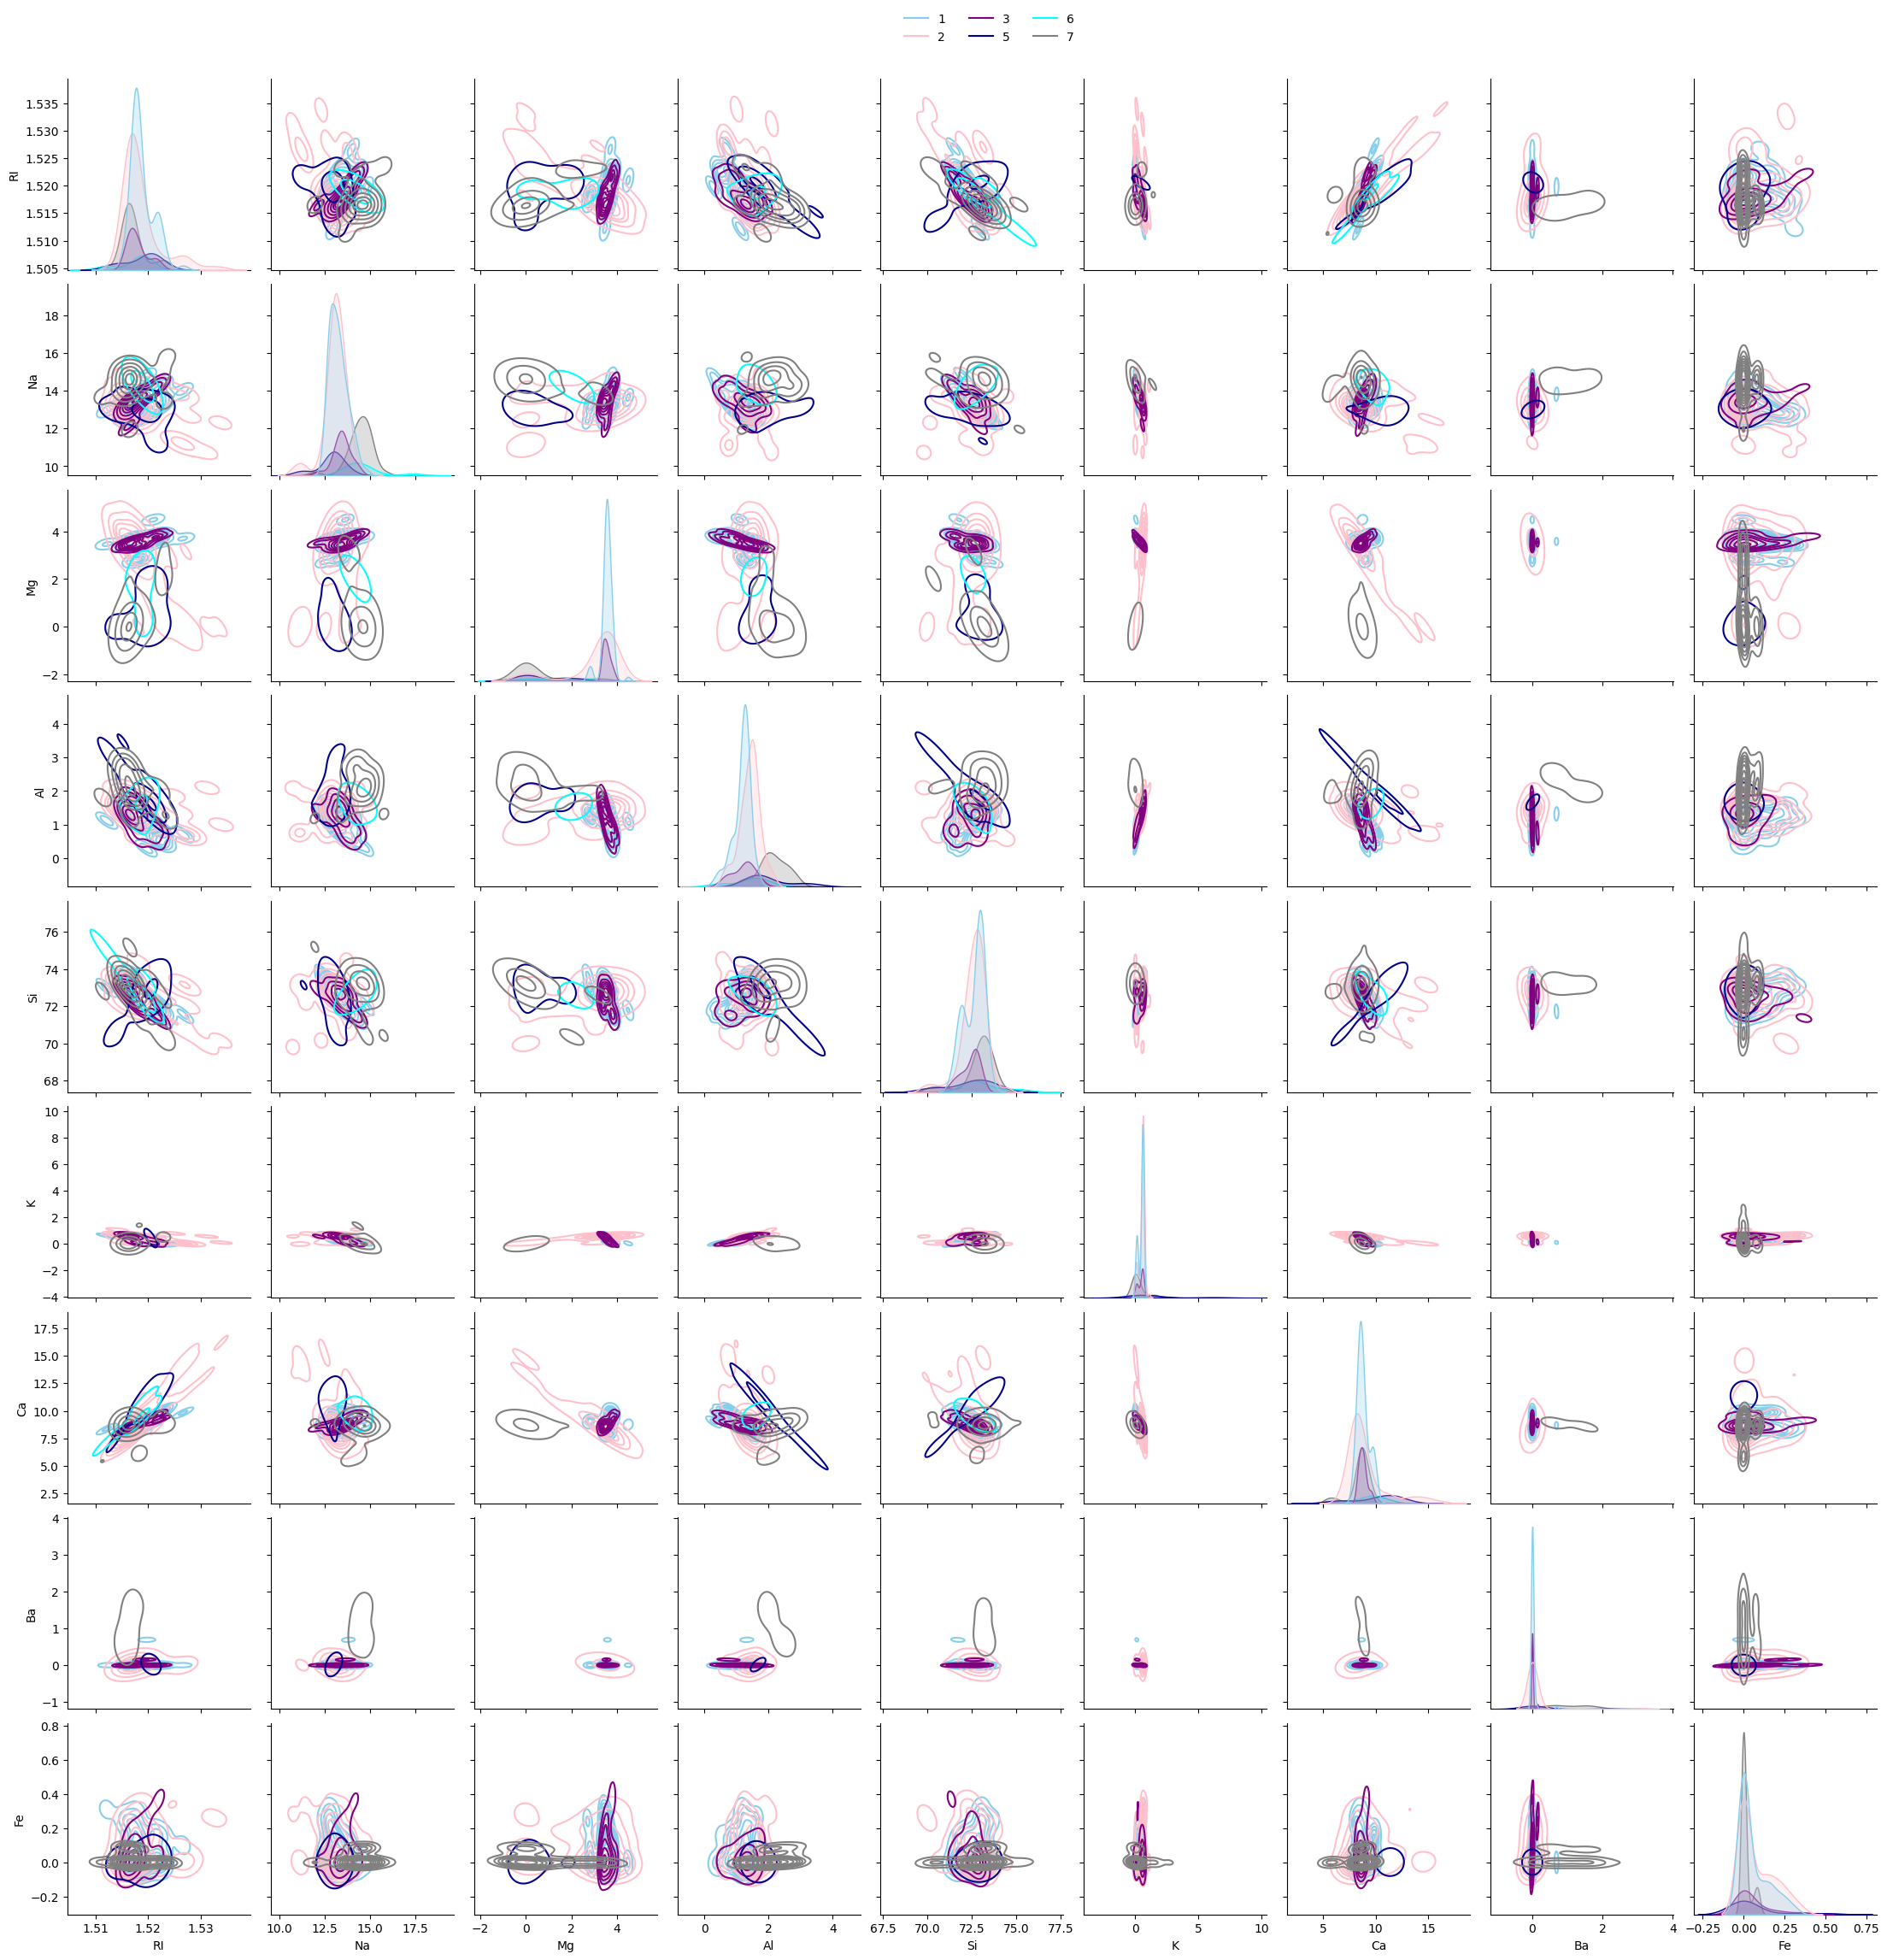

In [ ]:
# kernel density estimation
g=sns.pairplot(df, hue="Type_of_glass",kind="kde",palette=colors);
sns.move_legend(g, "lower center",bbox_to_anchor=(.5, 1),ncol=3, title=None);
for t, l in zip(g._legend.texts, target_names):
    t.set_text(l)

<Axes: >

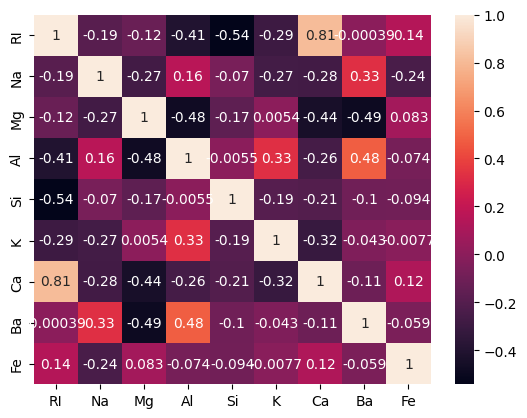

In [ ]:
sns.heatmap(X.corr(), annot=True)

In [ ]:
data = df.copy()
data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


<Axes: >

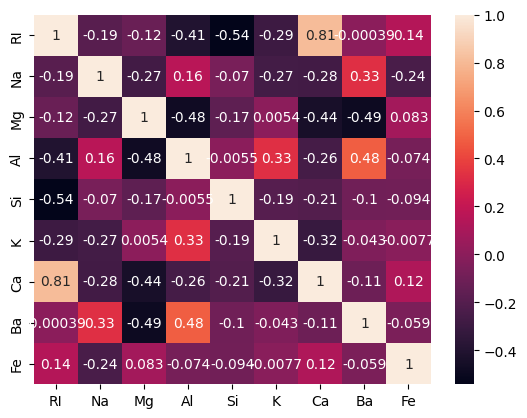

In [ ]:
sns.heatmap((df.drop(["Type_of_glass"], axis=1)).corr(), annot=True)

In [ ]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


## **Поделба на податочното множество**

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(df.drop(columns=["Type_of_glass", "Ca"]), df["Type_of_glass"], test_size=0.2, random_state=42)

# **Споредба на модели**

In [ ]:
GNB = GaussianNB()
GNB.fit(X_train1, y_train1)
y_pred = GNB.predict(X_test1)
accuracy_score(y_test1, y_pred)

0.5813953488372093

In [ ]:
LDA = LinearDiscriminantAnalysis()
LDA.fit(X_train1, y_train1)
y_pred = LDA.predict(X_test1)
accuracy_score(y_test1, y_pred)

0.7441860465116279

In [ ]:
QDA = QuadraticDiscriminantAnalysis(reg_param=0.1)
QDA.fit(X_train1, y_train1)
y_pred = QDA.predict(X_test1)
accuracy_score(y_test1, y_pred)

/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 4 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(


0.6046511627906976

Со отстранување на атрибутот "Ca" (има 0.81 корелација со RI - даваат иста информација, може да се тргне и RI - во тој случај ќе го задржиме Са) најдобар резултат според точноста добив со LDA - најверојатно податочното множество е линеарно сепарабилно. Кај Наивен Баесов се врши претпоставка дека атрбутите се условно независни, но како што можеме да видиме погоре со матрицата на корелација, тие се некако зависно поврзани. Исто така, Гаусов Наивен Баесов претпоставува нормална (Гаусова) распределба, но атрибутите во ова податочно множество ја немаат - може да се забележи во хистограмите погоре.
За QDA, се добива следниот error ( "/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 4 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn()" )  што веројатно значи дека некоја матрица не е сингуларна и затоа не може целосно точно да се пресмета.




---



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=["Type_of_glass"]), df["Type_of_glass"], test_size=0.2, random_state=42)

In [ ]:
GNB = GaussianNB()
GNB.fit(X_train, y_train)
y_pred = GNB.predict(X_test)
accuracy_score(y_test, y_pred)

0.5581395348837209

In [ ]:
LDA = LinearDiscriminantAnalysis()
LDA.fit(X_train, y_train)
y_pred = LDA.predict(X_test)
accuracy_score(y_test, y_pred)

0.6976744186046512

In [ ]:
QDA = QuadraticDiscriminantAnalysis(reg_param=0.1)
QDA.fit(X_train, y_train)
y_pred = QDA.predict(X_test)
accuracy_score(y_test, y_pred)

/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 4 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(


0.6046511627906976

Доколку не се отсрани атрибутот, повторно најдобра точност има LDA, но истата е помала од онаа кога ќе се отсрани атрибутот.